# Downloading Dataset from Kaggle

In [ ]:
import os
import kagglehub
import shutil

os.environ['KAGGLE_CONFIG_DIR'] = '/content'
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Path to dataset files:", path)

# Source and destination paths
source_path = '/root/.cache/kagglehub/datasets/architsharma01'
destination_path = '/content'  # Specify the desired destination folder in /content

# Move the folder
shutil.move(source_path, destination_path)

# Verify if the folder was moved successfully
if os.path.exists(destination_path):
  print(f"Folder moved successfully to {destination_path}")
else:
  print("Folder move failed.")

100%|██████████| 80.6k/80.6k [00:00<00:00, 56.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1
Folder moved successfully to /content


In [ ]:
file_path="/content/architsharma01/loan-approval-prediction-dataset/versions/1/loan_approval_dataset.csv"

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
print("Size of the Dataset:", df.shape)

Size of the Dataset: (4269, 13)


In [ ]:
print("Column Names and Data Types:")
print(df.info())

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usa

In [ ]:
print("Checking if there are any missing values:")
print(df.isnull().sum())

Checking if there are any missing values:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [ ]:
print("Descriptive Statistics:")
print(df.describe(include='all'))

Descriptive Statistics:
            loan_id  no_of_dependents  education self_employed  income_annum  \
count   4269.000000       4269.000000       4269          4269  4.269000e+03   
unique          NaN               NaN          2             2           NaN   
top             NaN               NaN   Graduate           Yes           NaN   
freq            NaN               NaN       2144          2150           NaN   
mean    2135.000000          2.498712        NaN           NaN  5.059124e+06   
std     1232.498479          1.695910        NaN           NaN  2.806840e+06   
min        1.000000          0.000000        NaN           NaN  2.000000e+05   
25%     1068.000000          1.000000        NaN           NaN  2.700000e+06   
50%     2135.000000          3.000000        NaN           NaN  5.100000e+06   
75%     3202.000000          4.000000        NaN           NaN  7.500000e+06   
max     4269.000000          5.000000        NaN           NaN  9.900000e+06   

         loan_a

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [ ]:
target_column = 'loan_status'

class_distribution = df[target_column].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


# Data Visulization before cleaning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                  'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value']
categorical_columns = ['education', 'self_employed', 'loan_status']


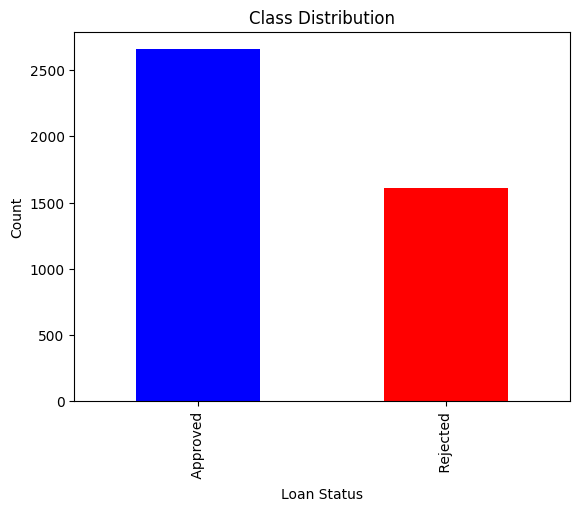

In [ ]:
df['loan_status'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.show()


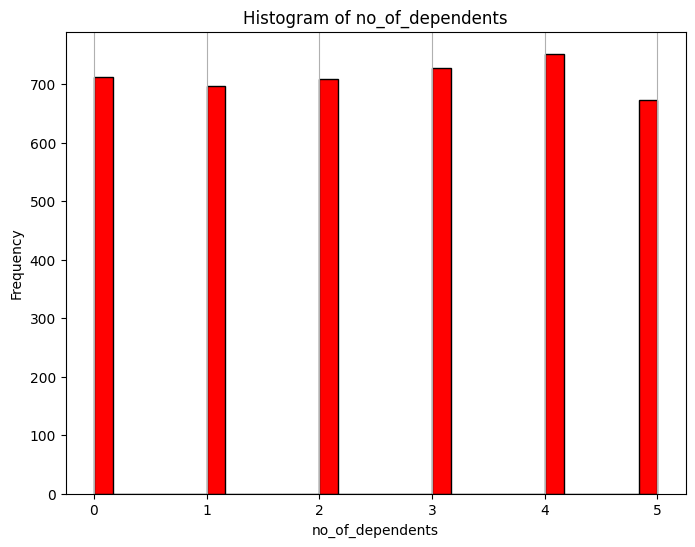

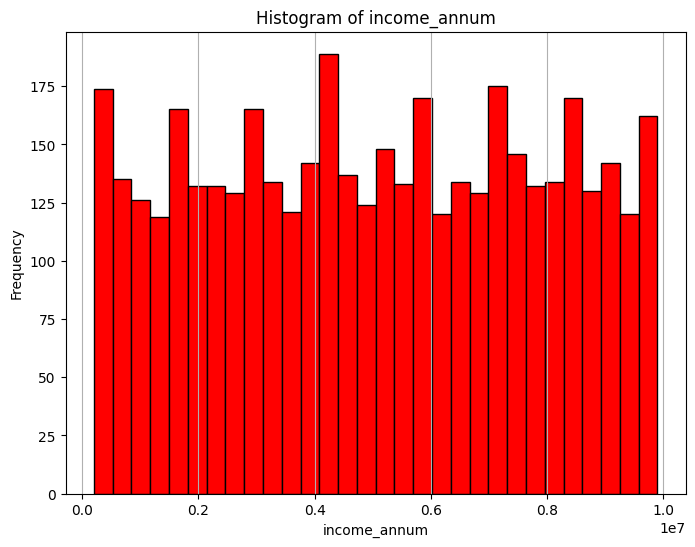

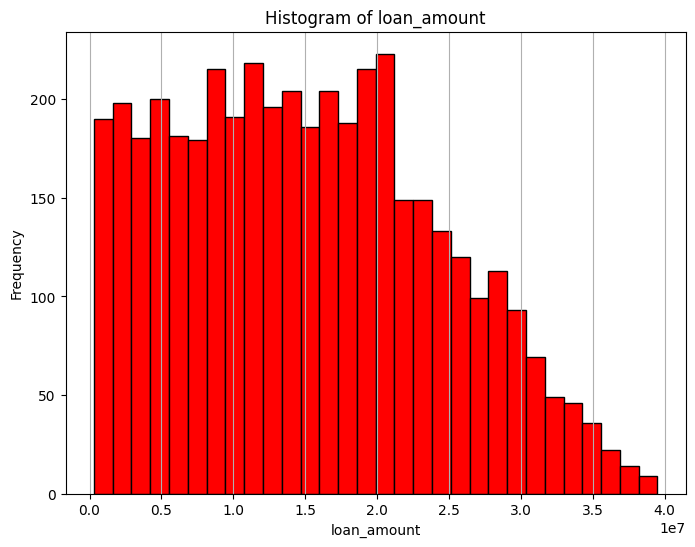

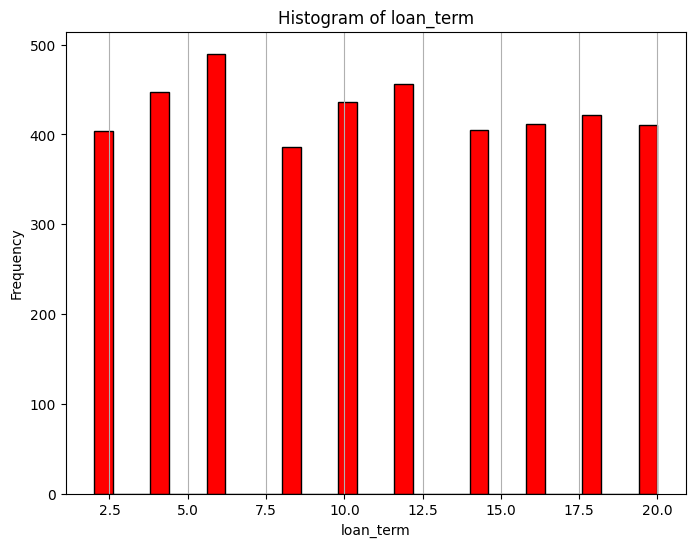

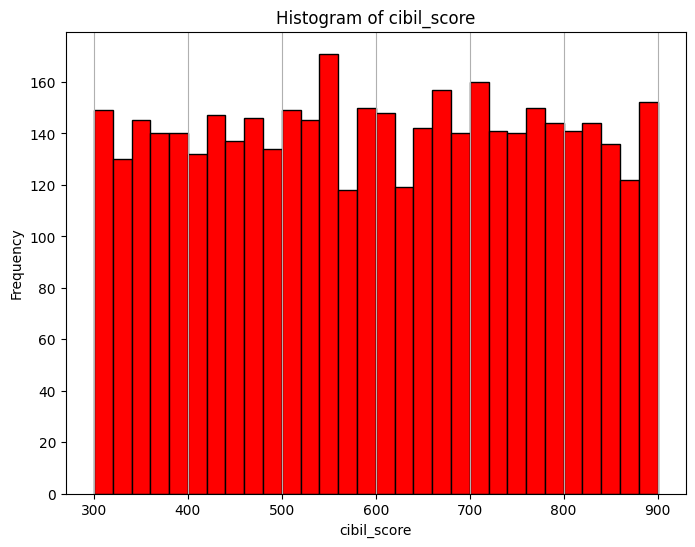

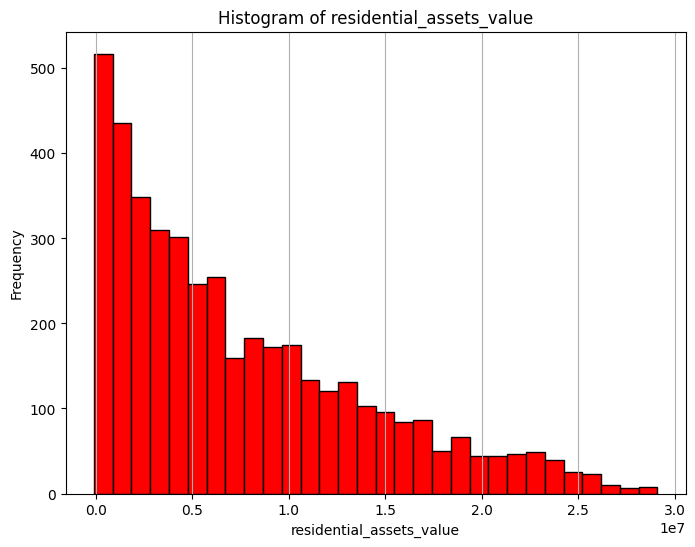

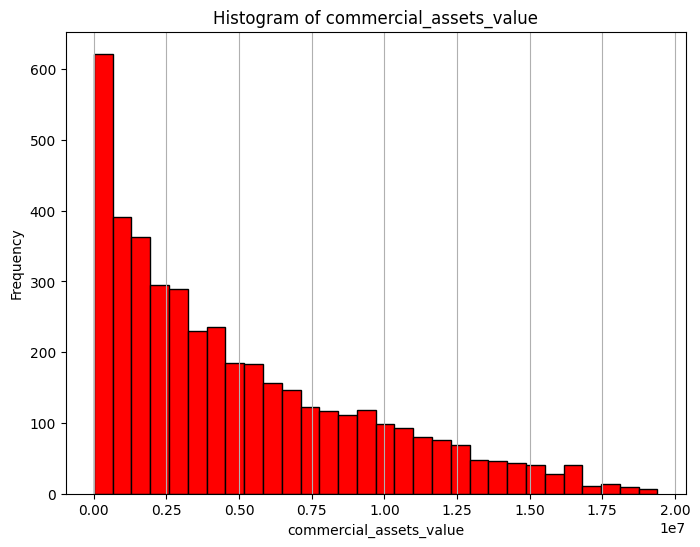

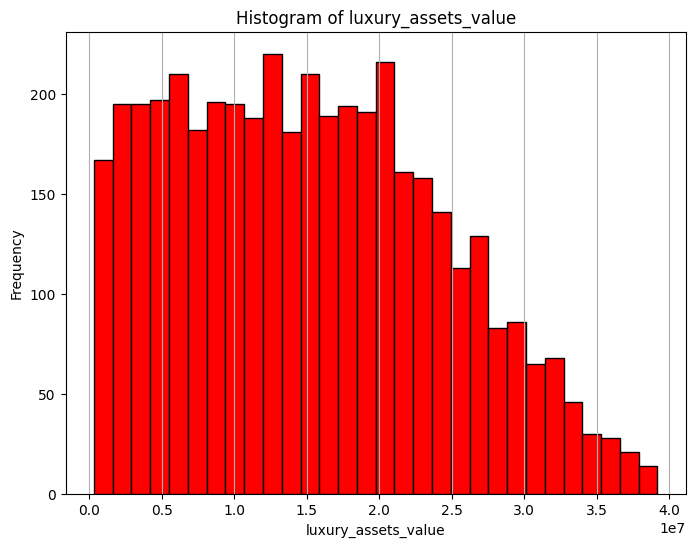

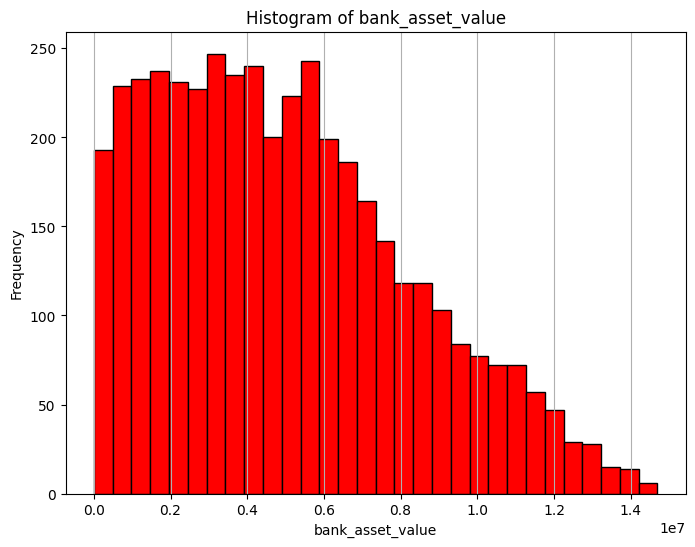

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=30, color='red', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()



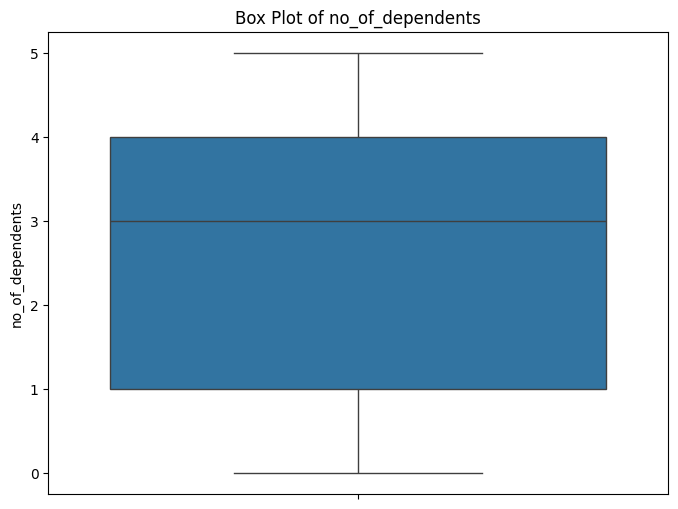

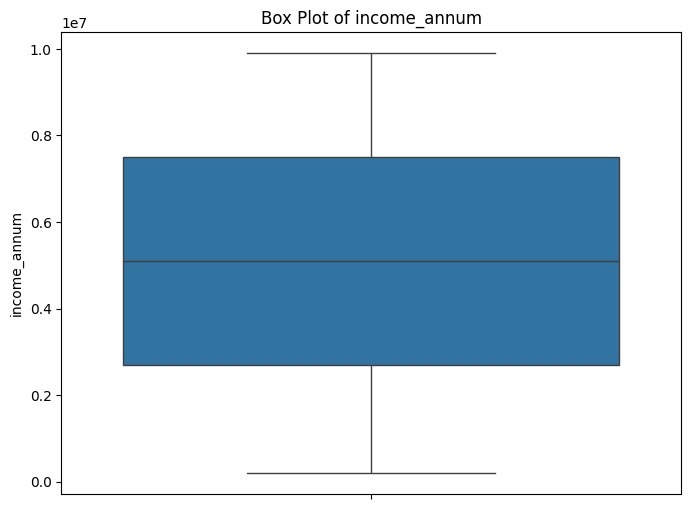

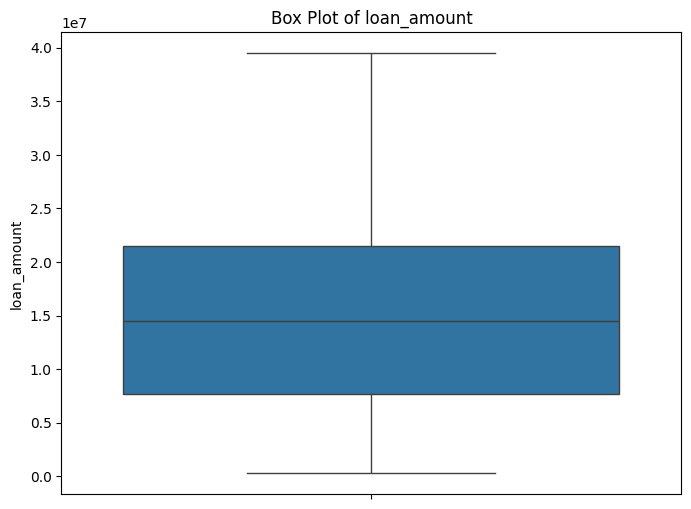

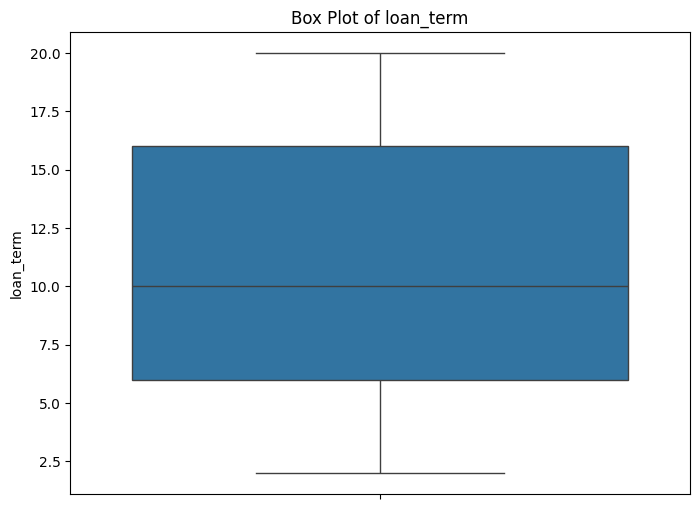

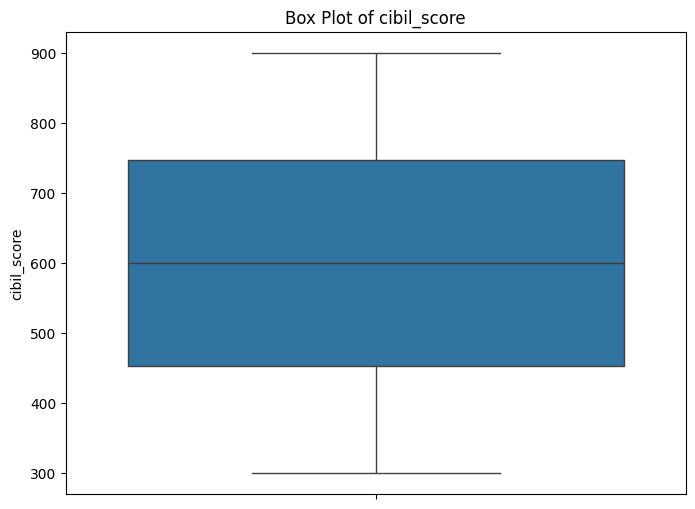

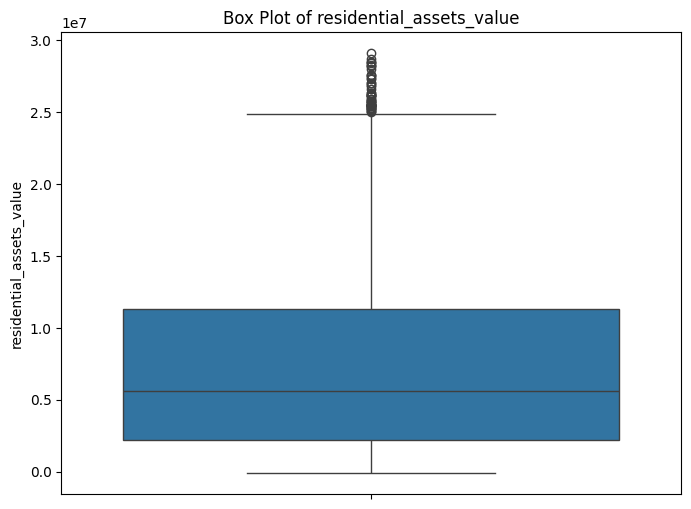

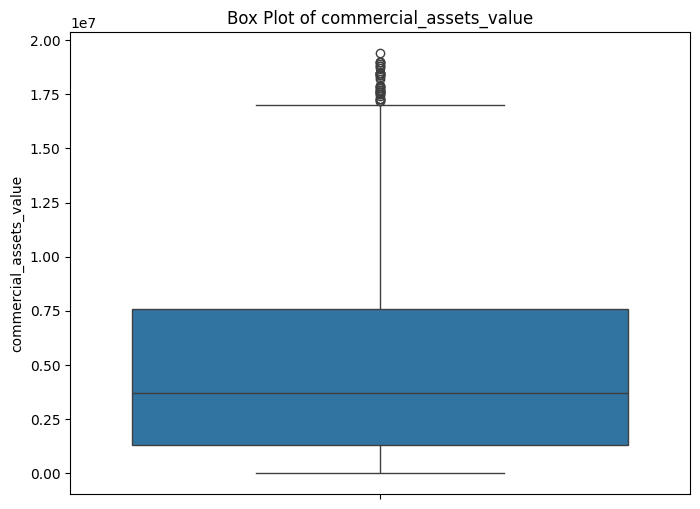

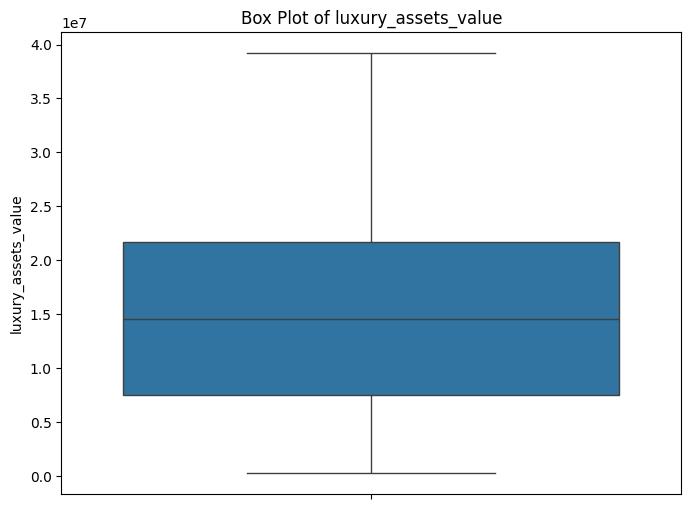

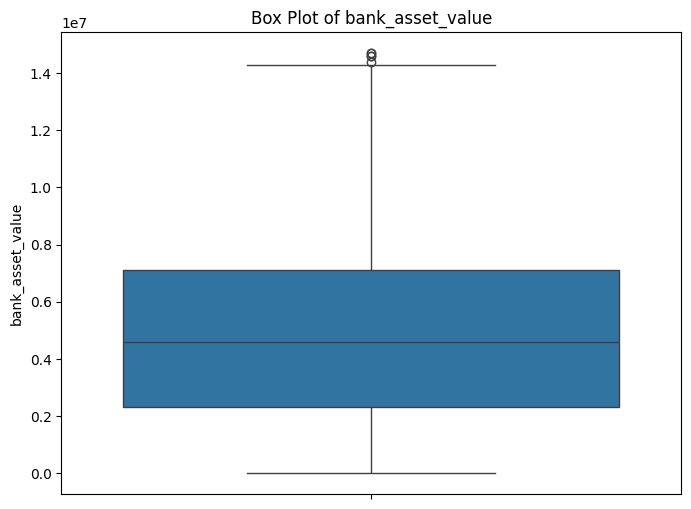

In [ ]:

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


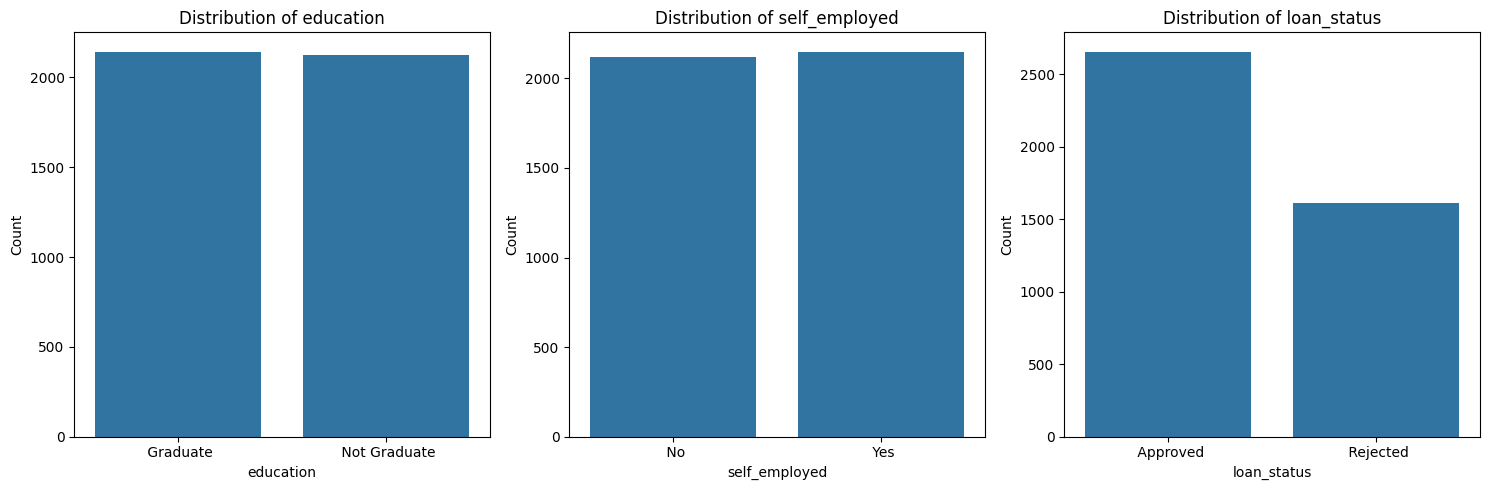

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

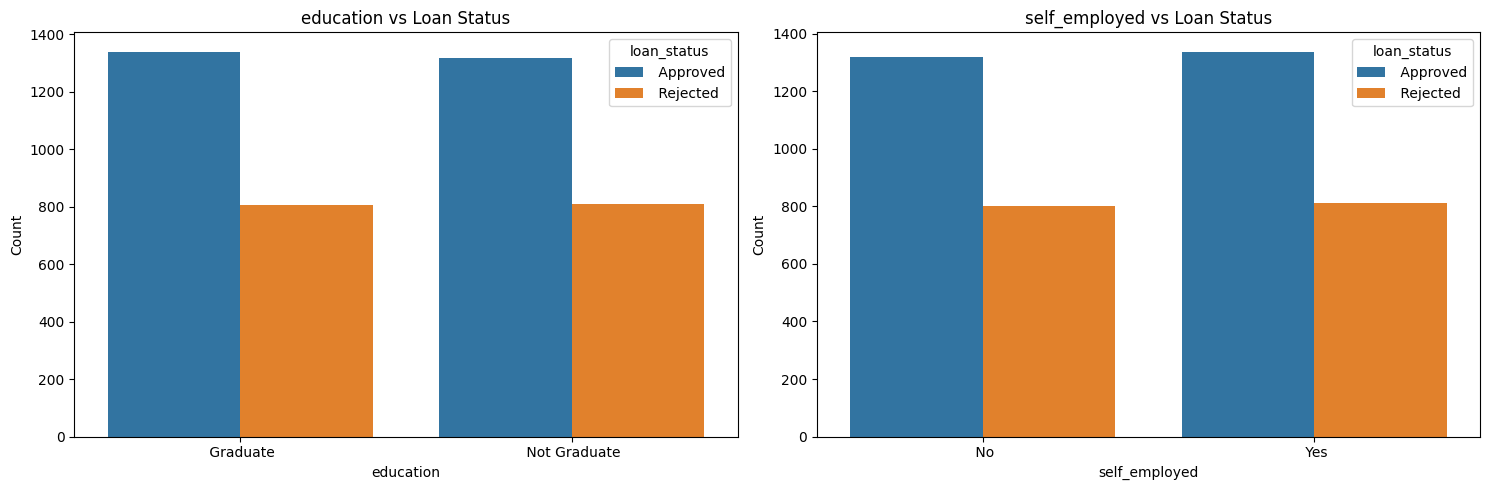

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

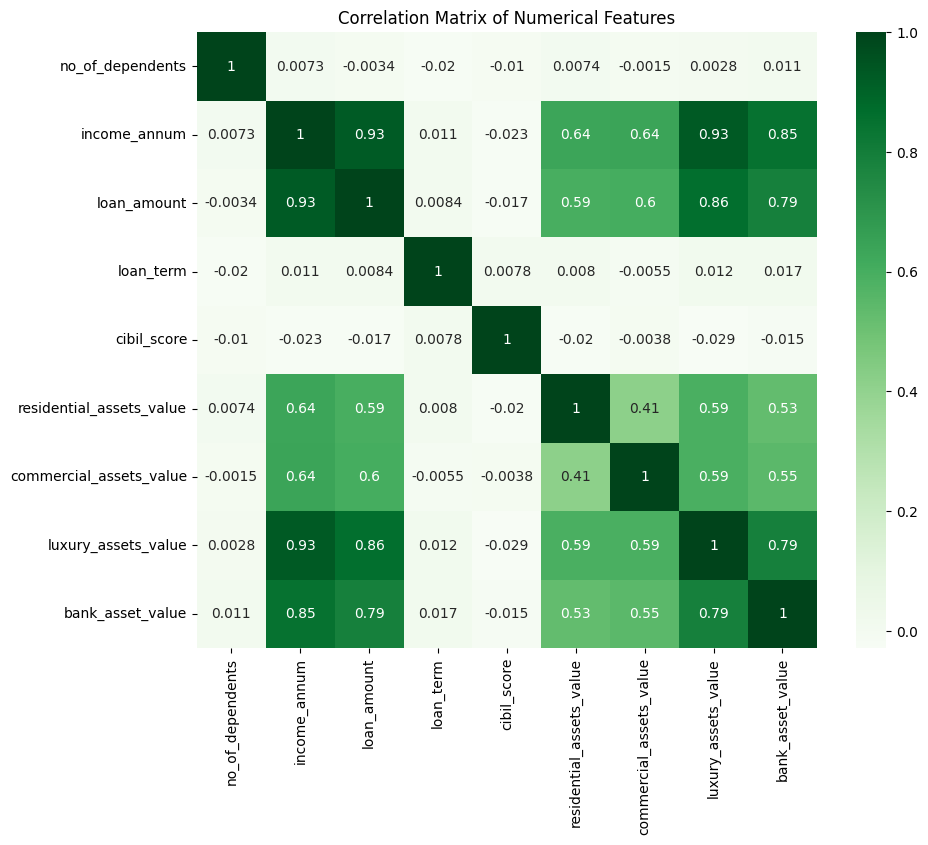

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data Cleaning

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_iqr = {col: detect_outliers_iqr(df, col) for col in numerical_cols}
print("Outlier: ", len(outliers_iqr))

Outlier:  9


In [ ]:
outlier_indices = []

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_indices.extend(outliers.index)

outlier_indices = list(set(outlier_indices))

df_cleaned = df.drop(index=outlier_indices)

print(f'Shape of DataFrame after outlier removal: {df_cleaned.shape}')



Shape of DataFrame after outlier removal: (4178, 13)


In [ ]:
cols_with_negatives = ['residential_assets_value', 'commercial_assets_value']
for col in cols_with_negatives:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: max(x, 0))

print("Negative values have been fixed.")


Negative values have been fixed.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

print("Numerical features have been normalized.")


Numerical features have been normalized.


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_cleaned['loan_status'] = label_encoder.fit_transform(df_cleaned['loan_status'])
df_cleaned['education'] = label_encoder.fit_transform(df_cleaned['education'])
df_cleaned['self_employed'] = label_encoder.fit_transform(df_cleaned['self_employed'])

print("Data after Label Encoding:\n", df_cleaned.head())


Data after Label Encoding:
    loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000      

# Data Visulization after Cleaning

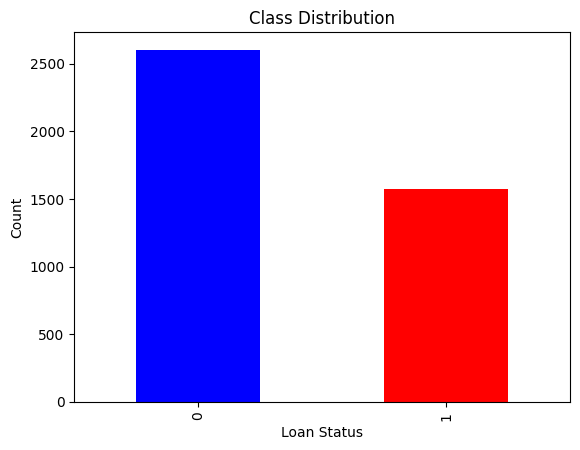

In [ ]:
df_cleaned['loan_status'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.show()


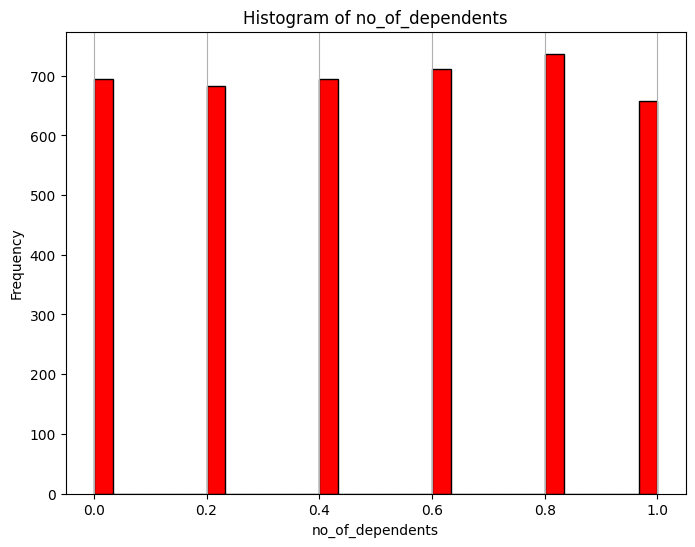

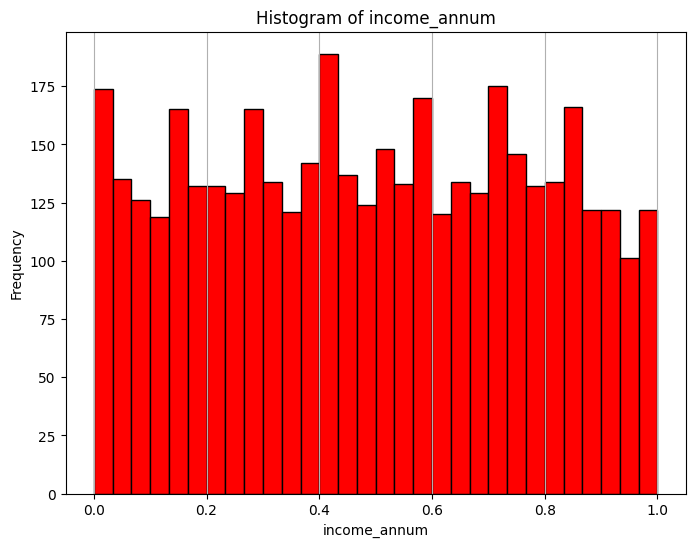

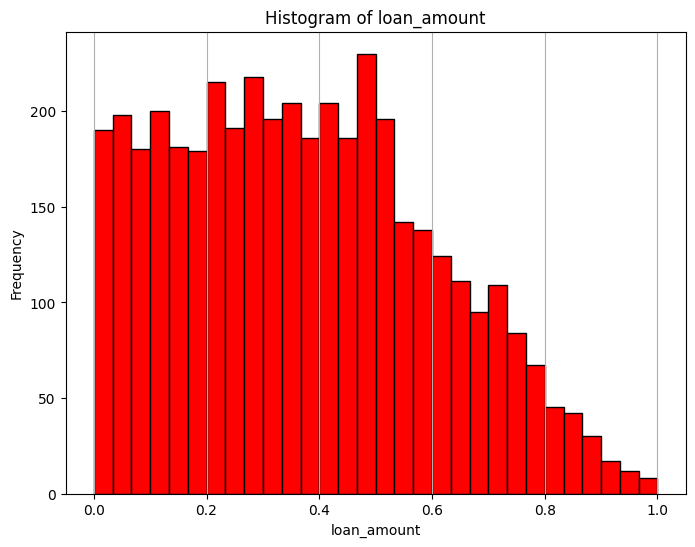

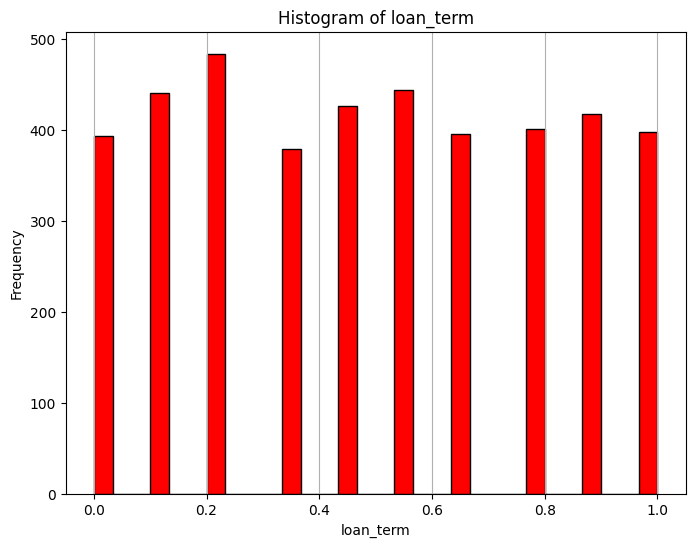

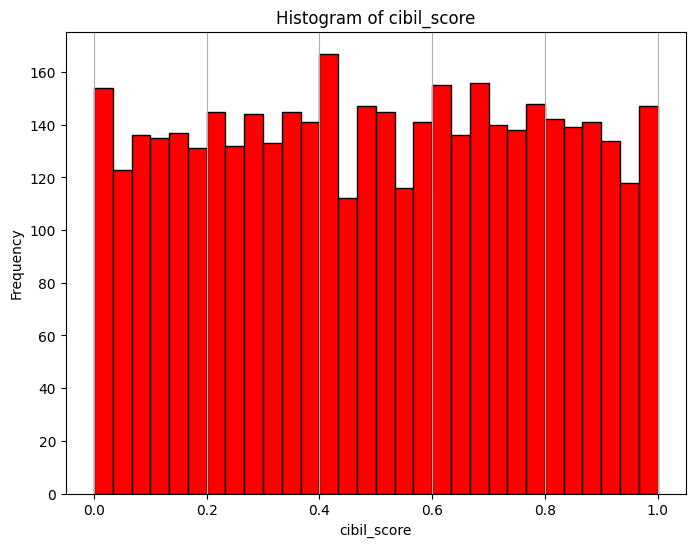

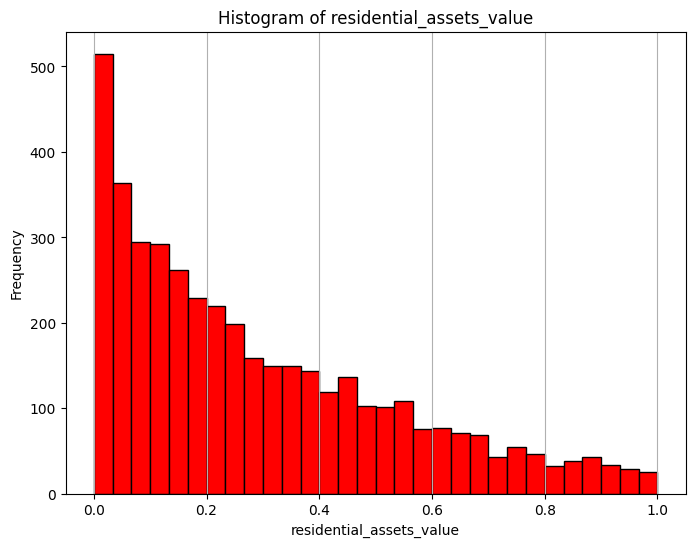

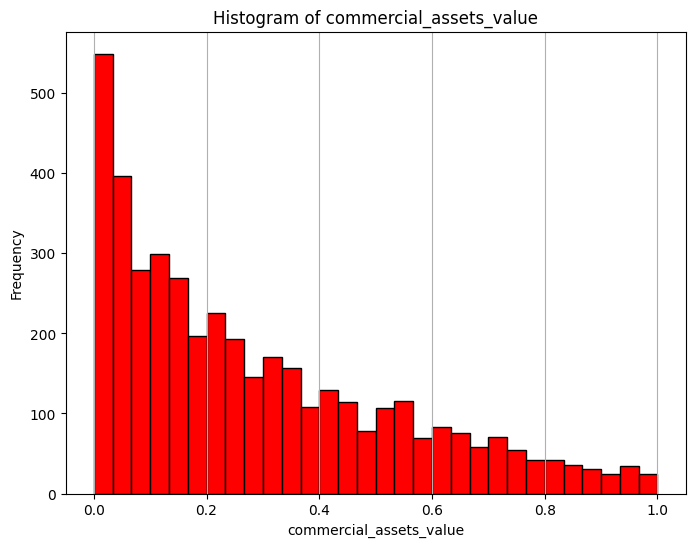

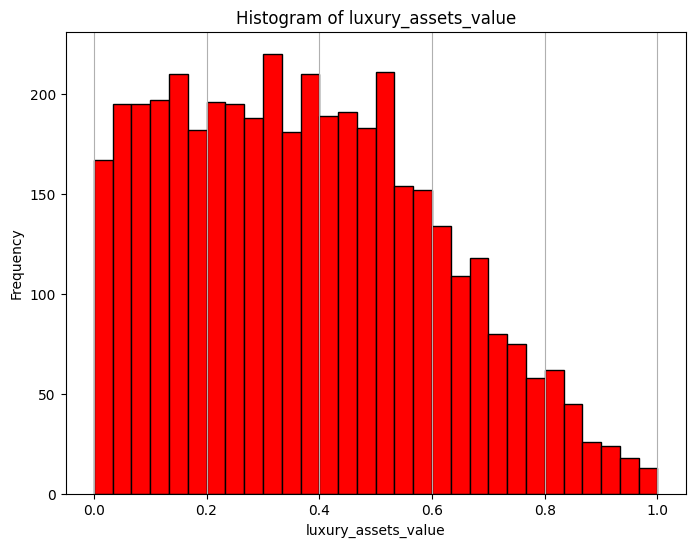

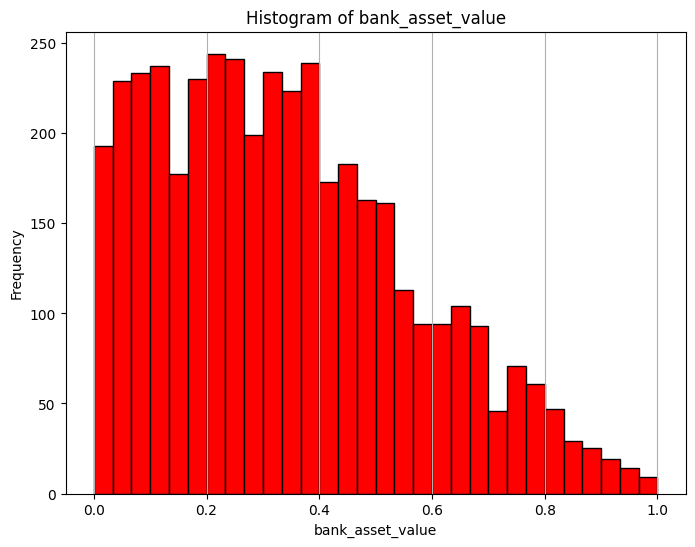

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df_cleaned[col].hist(bins=30, color='red', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()



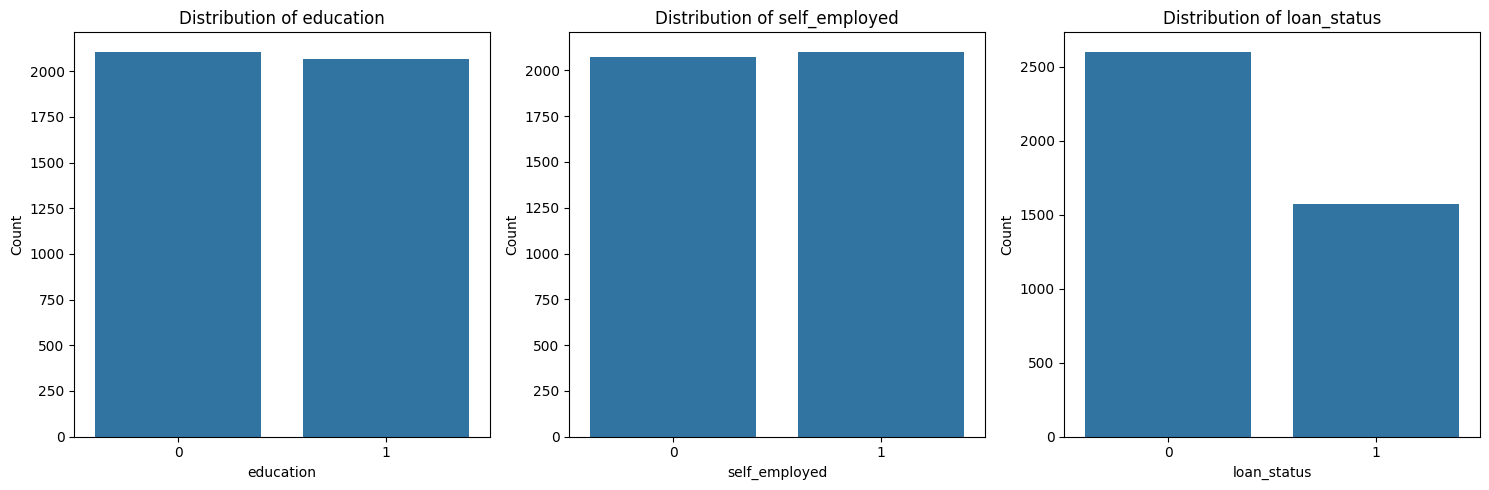

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df_cleaned[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

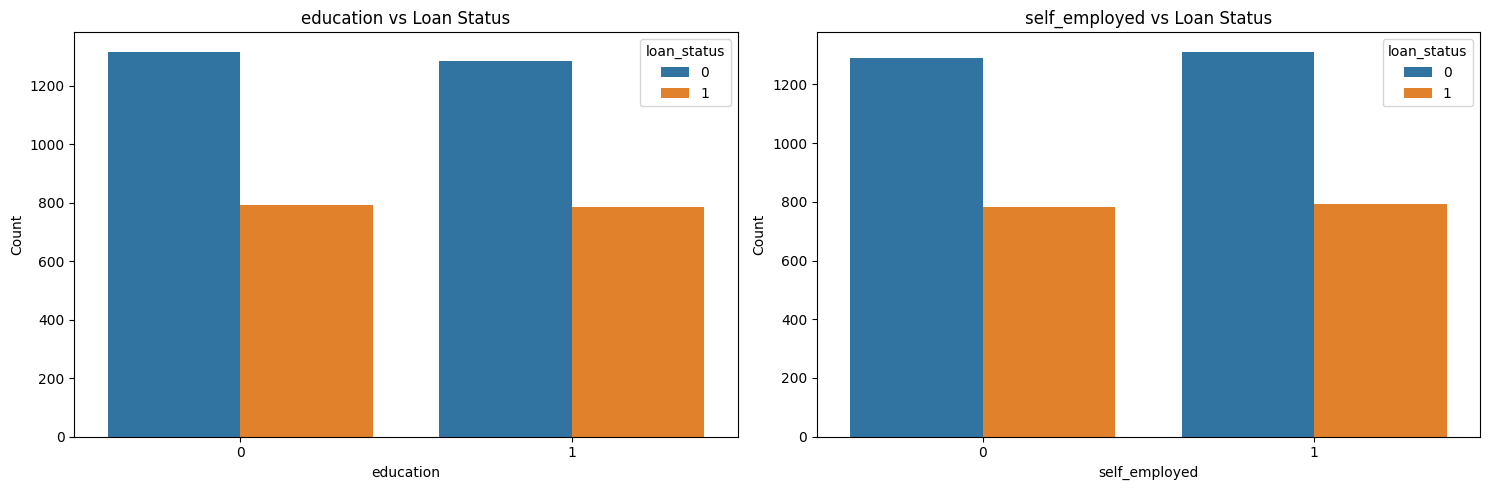

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, hue='loan_status', data=df_cleaned)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

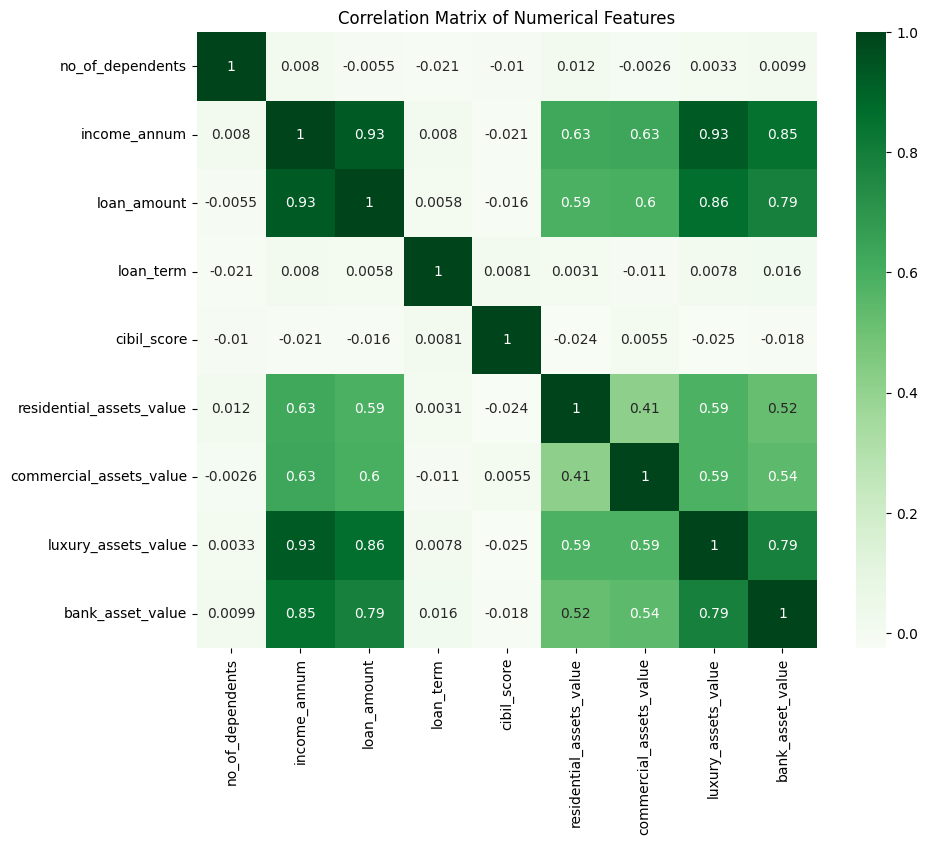

In [ ]:
correlation_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Selectio and PCA and Data Splitting

In [ ]:
df_cleaned = df_cleaned.drop(columns=['loan_id'])


In [ ]:
df_cleaned['total_assets_value'] = df_cleaned['luxury_assets_value'] + df_cleaned['commercial_assets_value'] + df_cleaned['bank_asset_value'] + df_cleaned['residential_assets_value']

In [ ]:
df_cleaned['average_assets_value'] = df_cleaned[['luxury_assets_value', 'commercial_assets_value', 'bank_asset_value', 'residential_assets_value']].mean(axis=1)

In [ ]:
df_cleaned.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value,average_assets_value
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.108434,0.129412,0.218509,0.230769,1,0.687124,0.171781
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.285141,0.264706,0.848329,0.895105,1,2.293280,0.573320
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.730924,0.194118,0.591260,0.552448,1,2.068749,0.517187
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.497992,0.482353,0.748072,0.349650,1,2.078067,0.519517
5,0.0,0,1,0.474227,0.336735,0.444444,0.031667,0.273092,0.488235,0.344473,0.356643,1,1.462444,0.365611


In [ ]:
df_cleaned = df_cleaned.drop(columns=['luxury_assets_value', 'commercial_assets_value', 'bank_asset_value', 'residential_assets_value','total_assets_value'])

In [ ]:
df_cleaned.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,average_assets_value
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,1,0.171781
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,1,0.573320
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,1,0.517187
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,1,0.519517
5,0.0,0,1,0.474227,0.336735,0.444444,0.031667,1,0.365611


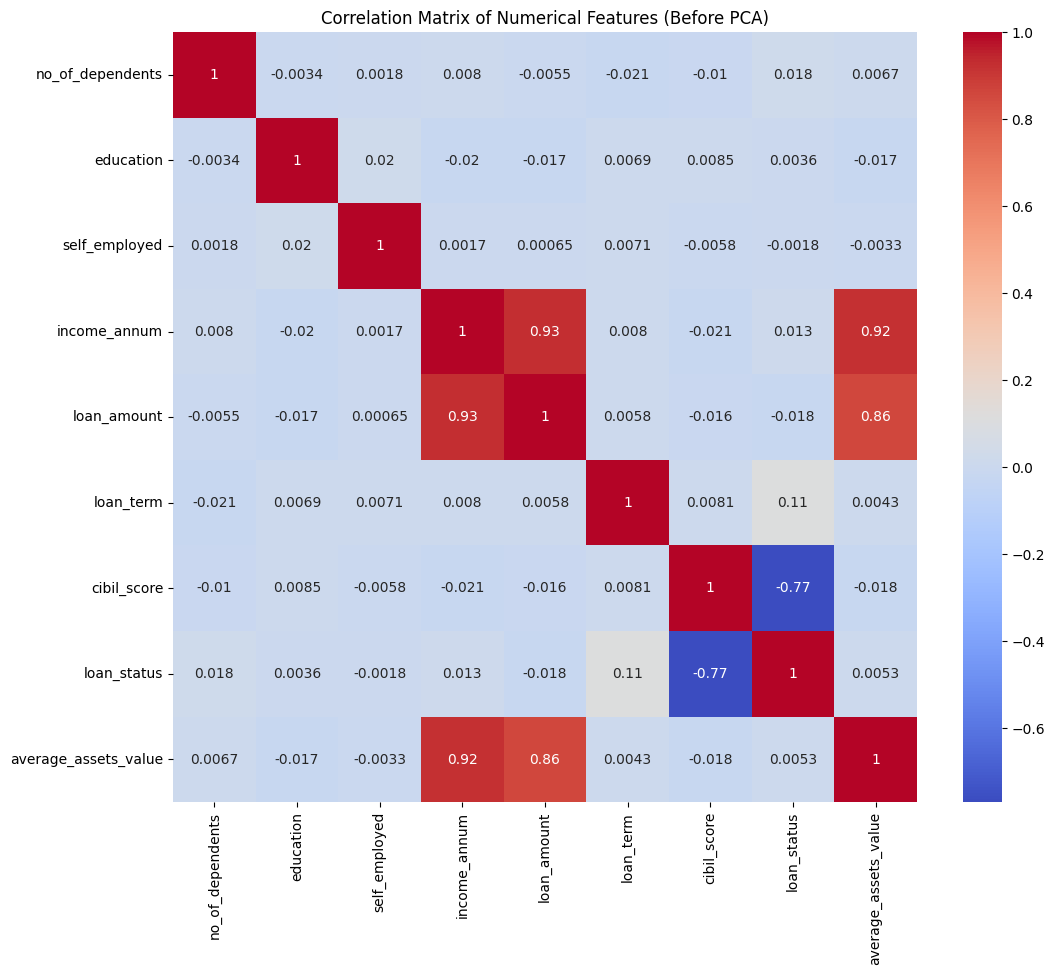

In [ ]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features (Before PCA)')
plt.show()


In [ ]:
x = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

print(f"Transformed training data shape: {X_train.shape}")
print(f"Transformed test data shape: {X_test.shape}")


Transformed training data shape: (3342, 5)
Transformed test data shape: (836, 5)


# Imports for the Models and Accuracy Messaures

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve


# Logistic Regression Model

In [ ]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

predictions = log_model.predict(X_test)


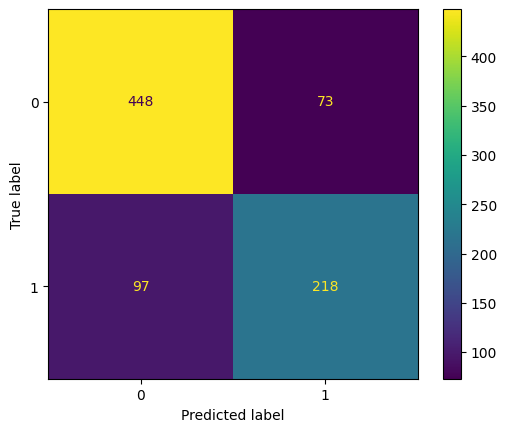

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
lr_accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', lr_accuracy*100, '%')
lr_precision = precision_score(y_test, predictions, average='binary')

print('Precision:', lr_precision*100, '%')
lr_recall = recall_score(y_test, predictions, average='binary')

print('Recall:', lr_recall*100, '%')
lr_f1 = f1_score(y_test, predictions, average='binary')

print('F1 score:', lr_f1*100, '%')

Accuracy: 79.66507177033493 %
Precision: 74.91408934707904 %
Recall: 69.2063492063492 %
F1 score: 71.94719471947195 %


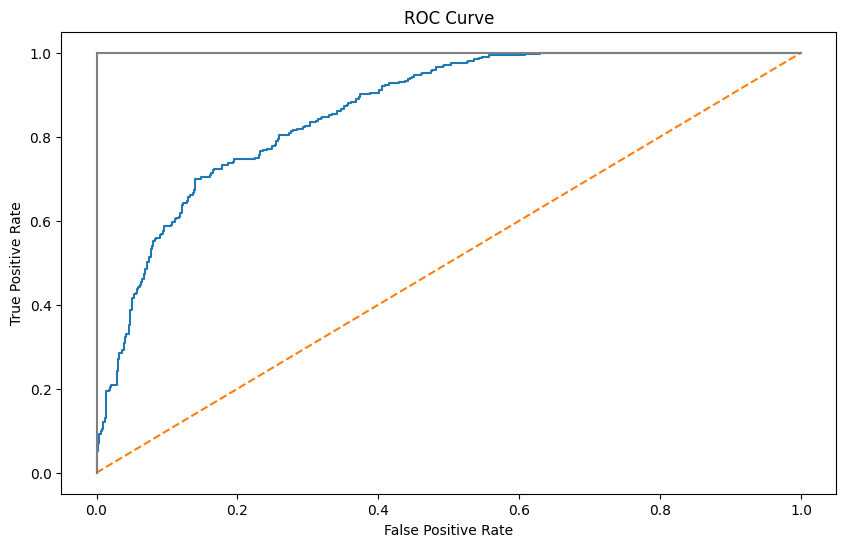

In [ ]:
# Get the predicted probabilities
y_pred_prob = log_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision **Tree**

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

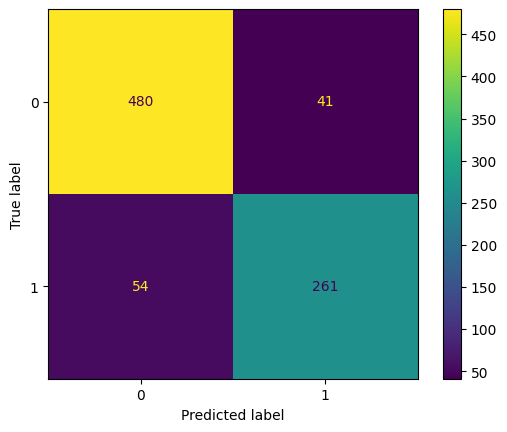

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
lr_accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', lr_accuracy*100, '%')
lr_precision = precision_score(y_test, predictions, average='binary')

print('Precision:', lr_precision*100, '%')
lr_recall = recall_score(y_test, predictions, average='binary')

print('Recall:', lr_recall*100, '%')
lr_f1 = f1_score(y_test, predictions, average='binary')

print('F1 score:', lr_f1*100, '%')

Accuracy: 88.63636363636364 %
Precision: 86.42384105960265 %
Recall: 82.85714285714286 %
F1 score: 84.60291734197732 %


# Random Forrest

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

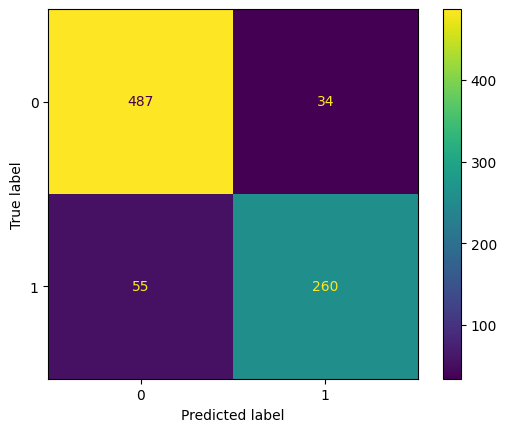

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
lr_accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', lr_accuracy*100, '%')
lr_precision = precision_score(y_test, predictions, average='binary')

print('Precision:', lr_precision*100, '%')
lr_recall = recall_score(y_test, predictions, average='binary')

print('Recall:', lr_recall*100, '%')
lr_f1 = f1_score(y_test, predictions, average='binary')

print('F1 score:', lr_f1*100, '%')

Accuracy: 89.35406698564593 %
Precision: 88.43537414965986 %
Recall: 82.53968253968253 %
F1 score: 85.38587848932676 %


# K-Means Clustering

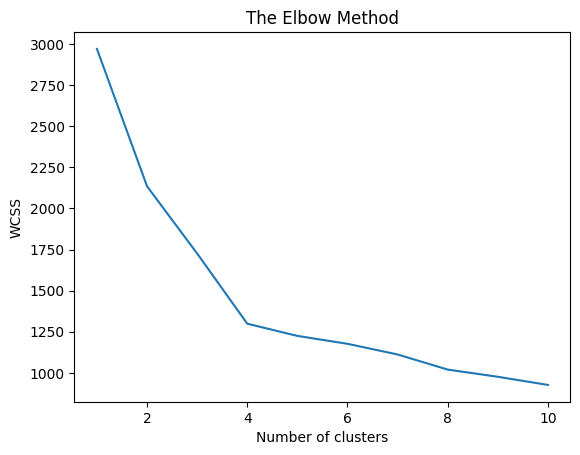

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

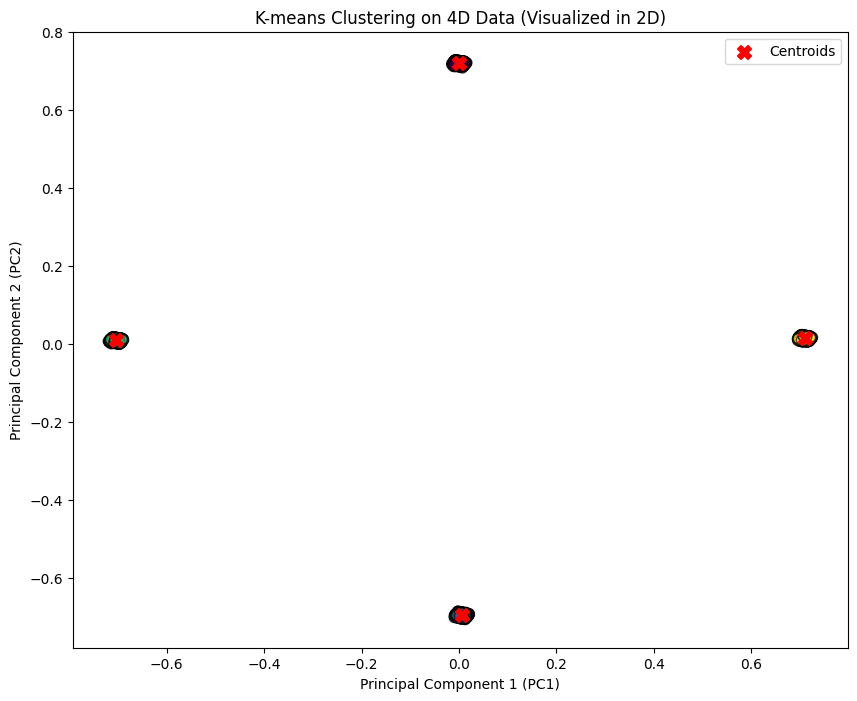

In [ ]:
cluster_labels = kmeans.predict(X_train)
X_2d = X_train[:, :2]

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-means Clustering on 4D Data (Visualized in 2D)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [ ]:
print(silhouette_score(X_train, y_kmeans))

0.4251232272882121


# Herirchal Clustering

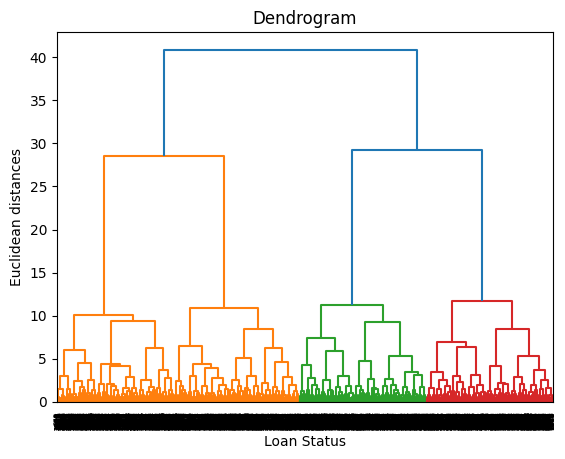

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Loan Status')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_hc = hc.fit_predict(X_train)

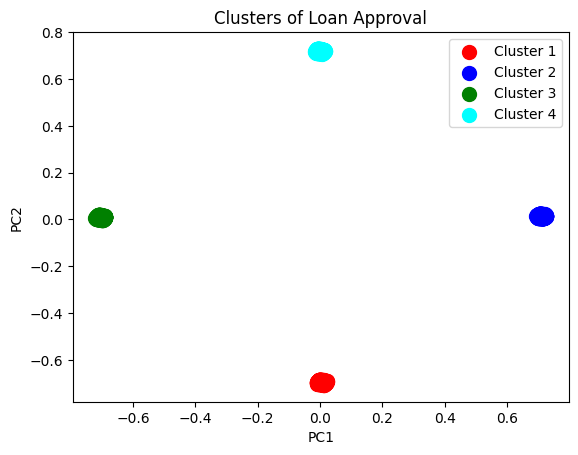

In [ ]:
plt.scatter(X_train[y_hc == 0, 0], X_train[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_hc == 1, 0], X_train[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_hc == 2, 0], X_train[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_hc == 3, 0], X_train[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Loan Approval')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
print(silhouette_score(X_train, y_hc))

0.4251232272882121
